<img src= "https://github.com/LateefMedley/Thinkful_Capstone1/blob/Branch1/penny.jpeg?raw=true" width="500" height="500">

Image from : https://www.flickr.com/photos/mseigafuse/24656278905


<h2>American Buying Power</h2>

<h5><i>By Lateef Medley</i></h5>

1. Business Insider author (Hillary Hoffower Apr. 27, 2019) posted an article not ironically titled “More Americans making $100,000 consider themselves working class than rich, and it shows just how expensive the US has become” 
    1. Link: https://www.businessinsider.com/six-figure-earners-think-working-class-not-rich-2019-4
1. The article highlights that people who grew up rich or earning a six-figure salary no longer “feel” wealthy
1. It also highlights a higher cost living relative to pay decreased the value of a six-figure salary

#### In the following presentation, I used datasets containing information about 5 different income brackets in the US and the housing price index containing data about different cities. 

##### This presentation is a simple look at income data compared to the housing price index in 6 US cities. 

Some of the things not talked about but should be expected to be covered in future work would be:
1. Inflation
1. Fluctuations in employment
1. Citizen Migration (like we are seeing with cities like New York and San Francisco Today)
1. For more see limitations section at the bottom of this notebook

Considering just Income and the housing price index of a few cities I am going to attempt to answer the following questions:
1. What does “wealthy” mean? 
2. When was 100k considered wealthy nationally? 
3. How fast is pay increased/declined over the years analyzed? 
4. How fast housing price index growing nationally and within a few cities? 
    1. Is income keeping up with the costs of living? 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statistics as st
import scipy.stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import stats
from scipy.stats import t
import seaborn as sns
%matplotlib inline


In [4]:
# csv's containing partially transformed data:
# Housing Price Index of American Cities
# An Avg of American Income by year
INCOME = pd.read_csv('income2.csv')
INCOME = INCOME.drop(columns='Unnamed: 0')
INCOME = INCOME.drop(columns='Number (thousands)')
INCOME['Fourth'] = INCOME['Fourth'].astype(copy=False, dtype='int64')
HOUSING_PRICE_INDEX = pd.read_csv('cities2.csv')


In [5]:
# Lists to iterate over for plots
CITY_IN = ['CA-Los Angeles', 'NY-New York', 'FL-Miami',
           'CO-Denver', 'NC-Charlotte', 'OR-Portland']
CITY_NAT = ['CA-Los Angeles', 'NY-New York',
            'FL-Miami', 'National-US', 'CO-Denver',
            'NC-Charlotte', 'OR-Portland']
HOUSING = HOUSING_PRICE_INDEX.loc[:, HOUSING_PRICE_INDEX.columns != 'date']


## Income

###### Defining the Data 

First let me define the income dataset I collected which contains; The upper limits of annual incomes for each fifth and lower limit of income for top 5 percent of all households from 1967 to last year Data This dataset is acquired from U.S. Census Bureau, Current Population Survey, Annual Social and Economic Supplements. 

In [7]:
def sum_stats(df, col_names):
    sum_chart = ['Length', 'Mean', 'Median', 'Min', 'Max', 'STD',
                 'Variance', 'Kurtosis', 'Skew']
    stat_t = []
    for col in col_names:
        stat_t.append([len(df[col]), st.mean(df[col]), st.median(df[col]),
                       np.min(df[col]), np.max(df[col]),
                       np.std(df[col], ddof=23), np.var(df[col]),
                       kurtosis(df[col]), skew(df[col])])
    return pd.DataFrame(stat_t, index=col_names, columns=sum_chart)
sum_stats(INCOME, INCOME.columns.values[1:])


,Length,Mean,Median,Min,Max,STD,Variance,Kurtosis,Skew
Lowest,30,23241.300000,23113.0,21639,25580,2250.094547,1.181349e+06,-0.895216,0.366020
Second,30,43984.466667,43675.0,41342,47110,3543.114479,2.929187e+06,-1.142242,0.199251
Third,30,69997.100000,70487.0,64985,74498,6320.127357,9.320269e+06,-1.282399,-0.161692
Fourth,30,110578.333333,112876.0,99622,121060,13790.583872,4.437538e+07,-1.271984,-0.442622
Top 5 percent,30,196522.766667,204452.5,167517,221900,33762.995990,2.659860e+08,-1.175548,-0.548488


##### What it implies regarding Income 

I believe the most notable characteristics of this chart is that the standard deviation and variance, increase from top to bottom when evaluating classes. Also, take notice that the skew from the lowest class to the highest move from top to bottom. Meaning that as you move away from the lowest class the concentration of people making less than the mean decrease. You can see the reflection of this across the following density and box plots. The box plots give evidence to this when looking at the median and mean relationship. With the exception of the second plot, the median moves further and further away from the mean. In the density plots, you can see this described in the histogram. The Kurtosis indicates that the distribution of each class is rather flat compared to a normal distribution.

Also, take notice that our “salary of interest” is at the bottom of the 2nd highest income bracket.

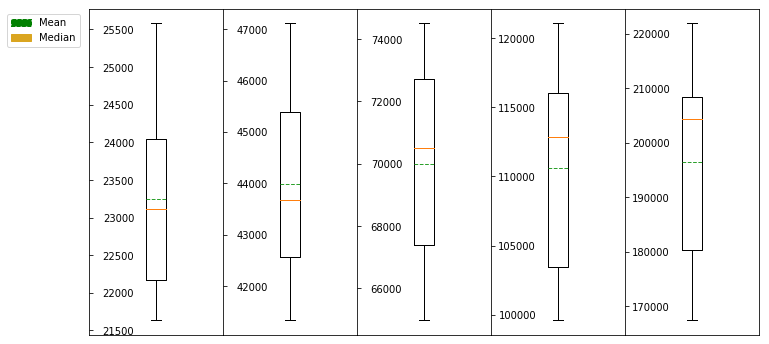

In [8]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0, hspace=0)
GREEN_DASH = mpatches.Patch(color='green', label='Mean', linestyle='dashed')
ORANGE_L = mpatches.Patch(color='goldenrod', label='Median', linestyle='solid')
for (i, x) in enumerate(INCOME.columns.values[1:]):
    plt.subplot(1, 5, i+1)
    plt.boxplot(INCOME[x], meanline=True, showmeans=True)
    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    plt.tick_params(axis="y", direction="in", pad=-45)
    if (i+1) == 5:
        plt.legend(handles=[GREEN_DASH, ORANGE_L],
                   loc='upper left', bbox_to_anchor=(-4.65, 1.0))


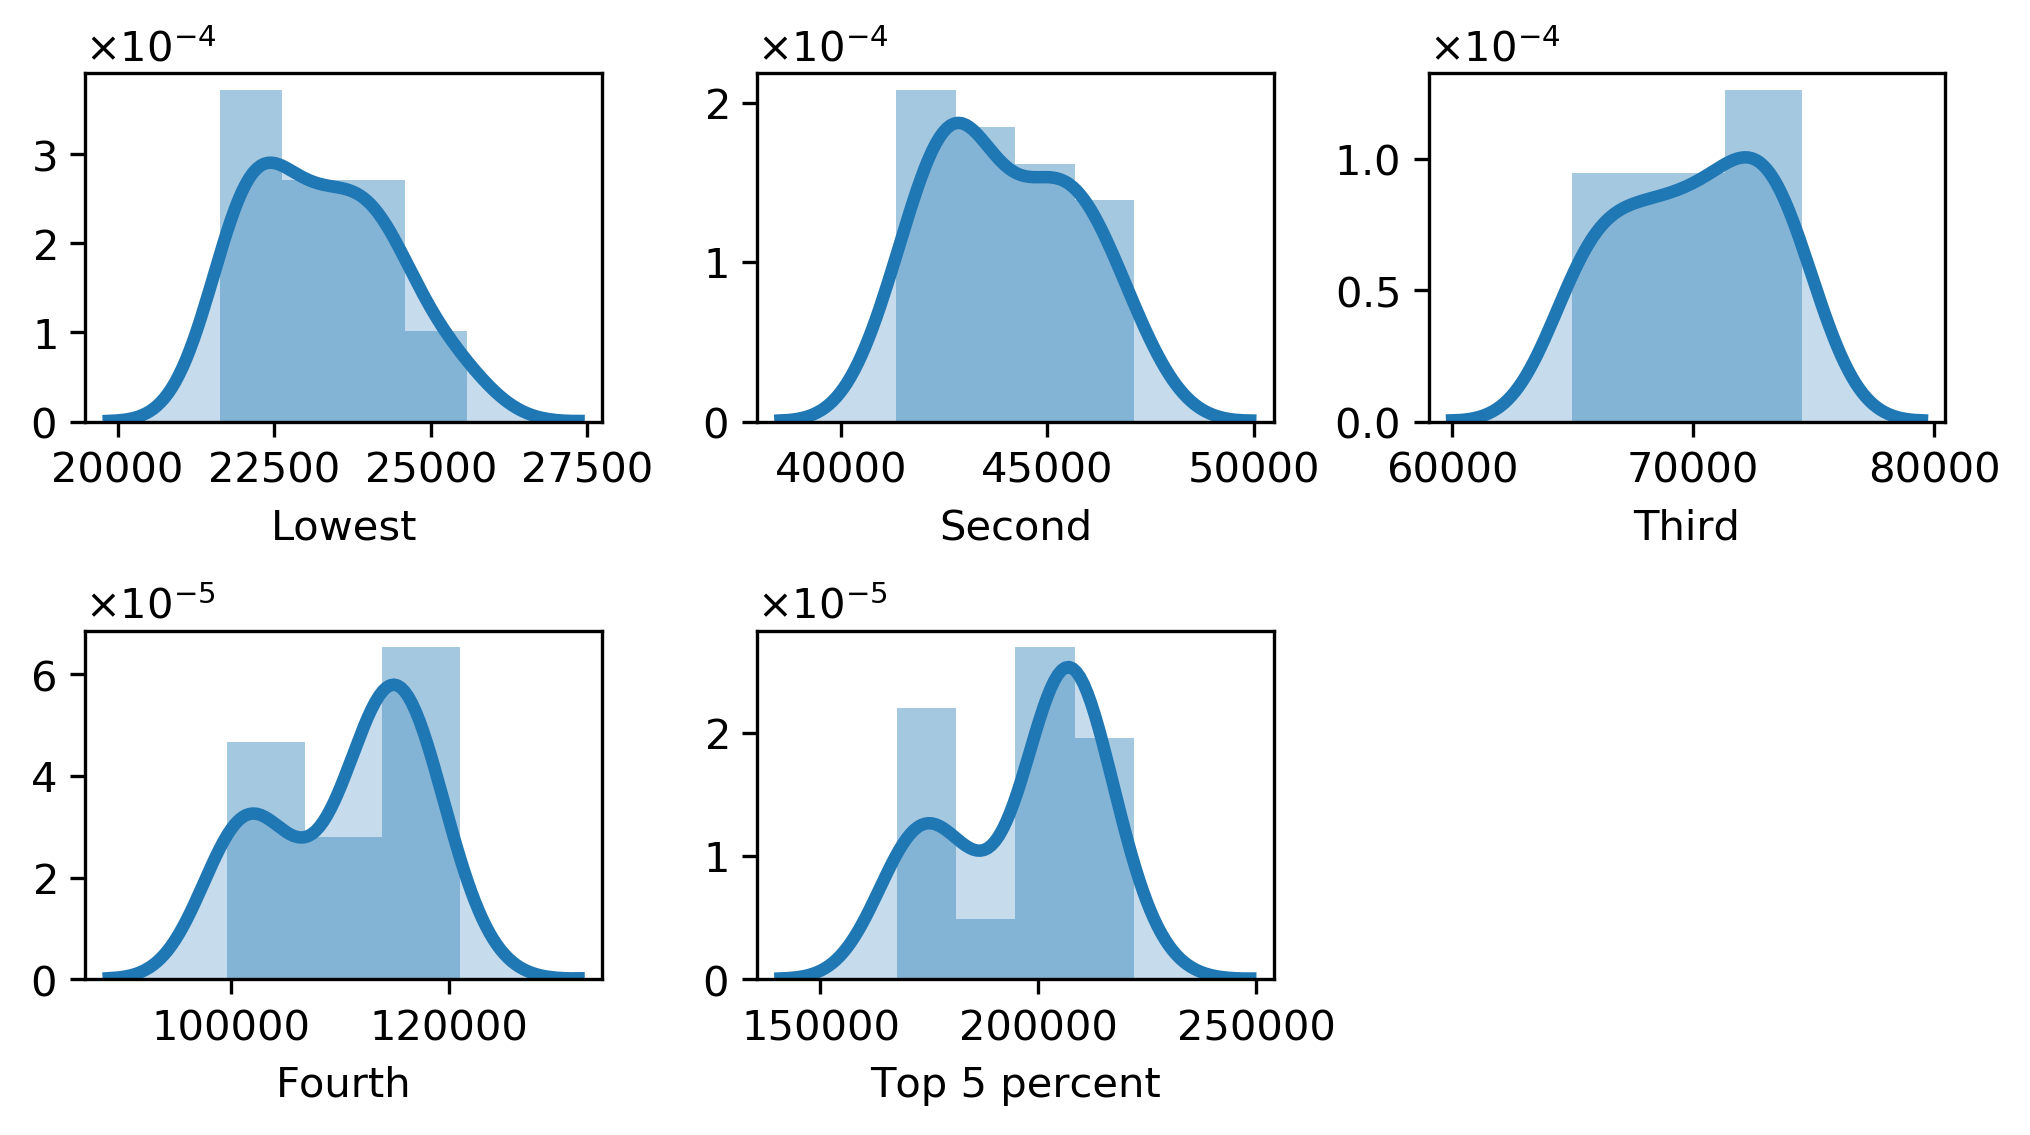

In [10]:
plt.figure(figsize=(8, 4), dpi=300)
for (i,x) in enumerate(INCOME.columns.values[1:]):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(hspace=.6, wspace=.3)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
    sns.distplot(INCOME[x], hist=True, kde_kws = {'shade': True, 'linewidth': 3})


The recession affected the income of all classes around 2008 - 2011, but they are not affected equally. As you move from lowest to highest earners, the closer you are to the lower end the more "impact" the recession had on your income. I'm sure that employment details would shed a lot more light on this. 

Given that the range of incomes in each class is different, the lower your class is closer your income would dip back to 1990-1993 income levels during the later years shown in the below graph.

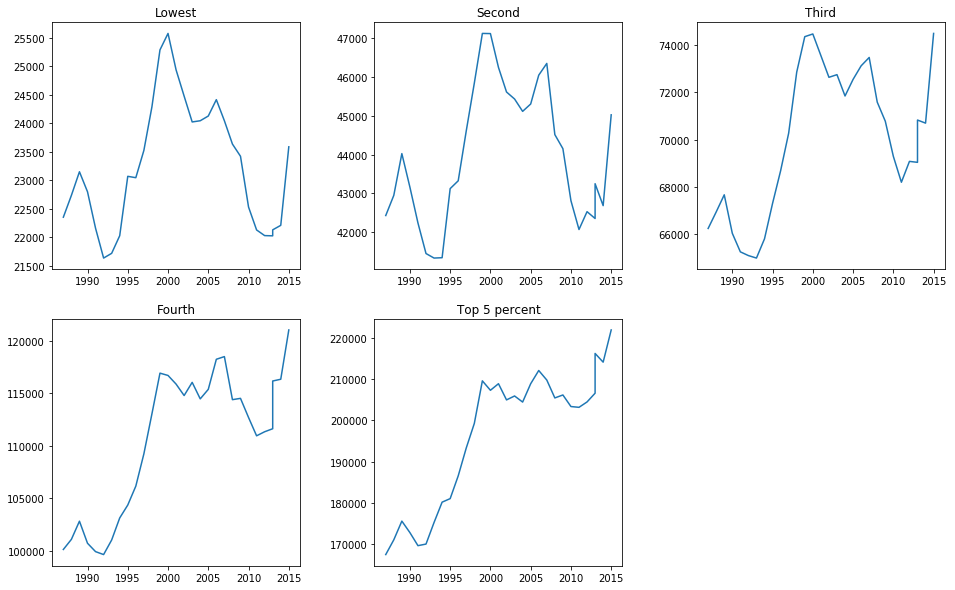

In [11]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=.3)
for (i, x) in enumerate(INCOME.columns.values[1:]):
    plt.subplot(2, 3, i+1)
    plt.plot(INCOME['Year'].iloc[:], INCOME[x])
    plt.title(x)


# How fast is income growing over this time period?

In [14]:
CHANGE_INCOME = pd.DataFrame()
for (i, x) in enumerate(INCOME.columns.values[1:]):
        CHANGE_INCOME[x] = ([(((b - a) / a)) for a, b in
                             zip(INCOME[x][0:-1], INCOME[x][1:-1])])
CHANGE_INCOME
CHANGE_INCOME.loc['Total', :] = CHANGE_INCOME.sum()
CHANGE_INCOME.loc['Total']


Lowest          -0.000523
Second           0.011321
Third            0.068816
Fourth           0.155192
Top 5 percent    0.252139
Name: Total, dtype: float64

# Wealthy Defined

<img src= "https://github.com/LateefMedley/Thinkful_Capstone1/blob/Branch1/capture.JPG?raw=true" width="1200" height="850">

Chart from https://fred.stlouisfed.org/series/MEHOINUSA672N

There are a lot of definitions for what is to be considered wealthy in the United States, for the sake of this presentation we are going to go with the Pew definition of wealthy/upper class which it defines as: "adults whose annual household income is more than double the national median."

•	So essentially no one making 100k since 1987 can be considered wealthy by this standard

•	But this article was released in April of 2019, why isn’t this just “old news?” Why notice it now?

That is where the housing price index and other costs of living factors come into play. A house being one of the biggest purchases a lot people make in their lives, the affordability of housing in a desirable neighborhood could certainly influence how someone feels about their "wealth." 

# Housing Price Index

### Housing Price Index Defined 

Data comes from S&P Case-Shiller data and includes both the national index and the indices for 20 metropolitan regions. The indices are created using a repeat-sales methodology.

(more info) The S&P/Case-Shiller U.S. National Home Price Index is a composite of single-family home price indices for the nine U.S. Census divisions and is calculated monthly. It is included in the S&P/Case-Shiller Home Price Index Series which seeks to measure changes in the total value of all existing single-family housing stock.

### Housing Summary Stats Notes

Some of the most notable stats here are that: there is quite a difference regarding variance from city to city. Just consider the standard deviation and variance numbers of Charlotte compared to Los Angeles. This leads me to believe that stats based on locality is a better indicator as to the cost of living than just the national index alone. Also in Miami and Tampa, the skew is close to one, which means that the data is skewed towards the left. 

In [15]:
sum_stats(HOUSING_PRICE_INDEX,
          HOUSING_PRICE_INDEX.columns.values[1:]).transpose()


,CA-Los Angeles,CA-San Diego,CA-San Francisco,CO-Denver,DC-Washington,FL-Miami,FL-Tampa,IL-Chicago,MA-Boston,NC-Charlotte,NV-Las Vegas,NY-New York,OH-Cleveland,OR-Portland,National-US
Length,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
Mean,141.346552,133.106207,120.794483,101.331379,141.251034,133.208966,123.847241,107.459655,119.211379,100.608966,115.500345,129.226552,94.310345,111.044138,118.066207
Median,116.490000,124.960000,127.510000,119.620000,120.510000,116.700000,115.670000,111.150000,125.170000,104.320000,97.960000,118.990000,99.480000,106.830000,113.190000
Min,63.230000,56.980000,49.240000,47.660000,69.030000,69.960000,78.490000,56.950000,64.010000,65.530000,66.610000,74.040000,55.190000,41.500000,66.280000
Max,271.330000,246.560000,216.080000,168.890000,247.190000,276.640000,234.500000,166.780000,180.660000,133.200000,233.200000,214.560000,121.880000,183.780000,183.490000
STD,139.359052,130.663815,115.798907,81.733987,123.153431,127.184916,96.538852,67.946475,97.300989,46.908771,99.139334,107.157285,41.758092,96.929997,85.333540
Variance,4018.126629,3532.351555,2774.355901,1382.160957,3137.951885,3346.759195,1928.224110,955.184169,1958.789495,455.261954,2033.504996,2375.727678,360.773438,1943.880879,1506.582003
Kurtosis,-1.060218,-1.160596,-1.168959,-1.395610,-1.399947,-0.119305,-0.153825,-1.000256,-1.739309,-1.325112,0.919071,-1.550944,-0.854524,-1.202857,-1.498454
Skew,0.541809,0.442631,0.387447,-0.152359,0.373929,0.911708,0.876484,0.246963,0.000713,-0.128822,1.387812,0.242786,-0.498676,0.051516,0.214064


The degree of varying house prices by the city is also indicated by the ranges in the following box plots. It is also notable that the median for the housing price index throughout this dataset is between 98-127, so no matter where you go in each of these cities you can expect the most middle prices for a home are going to be "relatively" similar. 

Let's say you are attempting to “Keep up with the Jones.” If we consider The Jones to be at the mean then in places like LA, Miami, and NY, you should be expecting to pay more to remain competitive with them. 

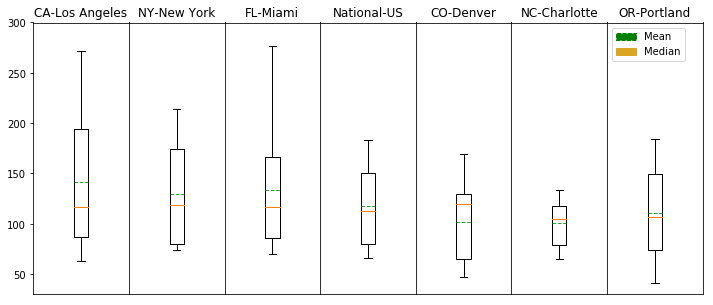

In [17]:
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0, hspace=0)
GREEN_DASH = mpatches.Patch(color='green', label='Mean', linestyle='dashed')
ORANGE_L = mpatches.Patch(color='goldenrod', label='Median', linestyle='solid')
for (i, x) in enumerate(CITY_NAT):
    plt.subplot(1, 7, i+1)
    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    if (i+1) != 1:
        plt.tick_params(axis='y', which='both', left=False, labelleft=False)
    if (i+1) == 7:
        plt.legend(handles=[GREEN_DASH, ORANGE_L], loc='upper left')
    plt.boxplot(HOUSING_PRICE_INDEX[x], meanline=True, showmeans=True)
    plt.ylim([30, 300])
    plt.title(x)


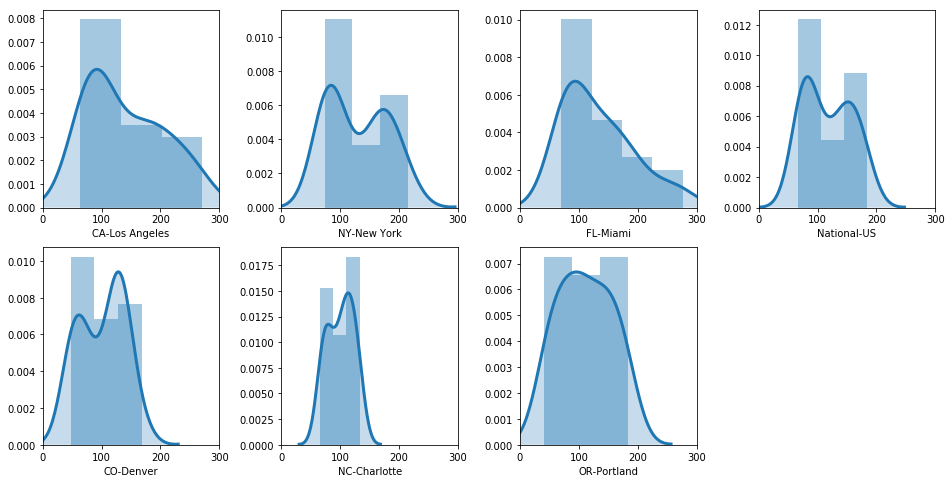

In [18]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=.2, wspace=.35)
for (i, x) in enumerate(CITY_NAT):
    plt.subplot(2, 4, i+1)
    plt.xlim([0, 300])
    sns.distplot(HOUSING_PRICE_INDEX[x], hist=True,
                 kde_kws={'shade': True, 'linewidth': 3})


Looking at a line graph we can see that within these years, our “Cities of Interest” seem to follow similar trends regardless of range. However, that trend affects each city is a little differently. Take notice that the cities like (LA) that appear to follow those national trends also seem to exaggerate those trends in their data. More concisely put, when the national average declines, cities similar to LA feel the impact of that more sharply than other “smaller” cities and the same is true when observing increases in the national market. 

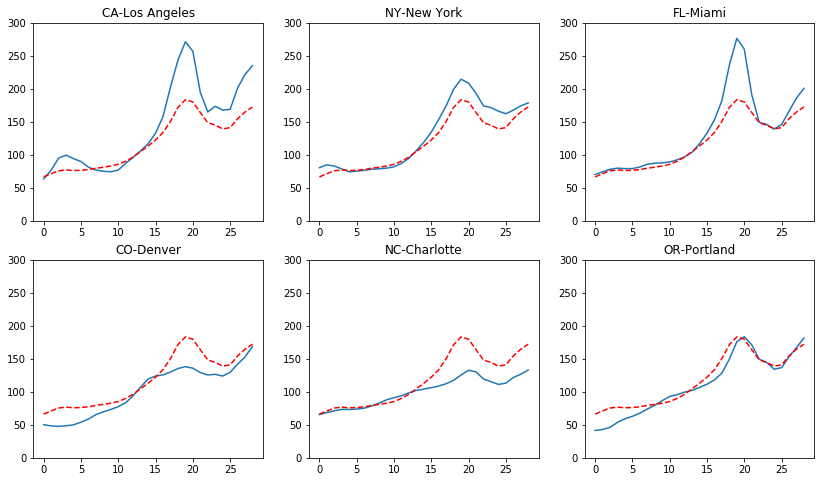

In [19]:
plt.figure(figsize=(14, 8))
for (i, x) in enumerate(CITY_IN):
    plt.subplot(2, 3, i+1)
    plt.ylim([0, 300])
    plt.plot(HOUSING_PRICE_INDEX[x])
    plt.plot(HOUSING_PRICE_INDEX['National-US'], 'r--')
    plt.title(x)


The national index has all of these city's data and more included in it, but how well does the national index actually correlate to each city?

# <h3> Correlation Heatmap (Pearson)</h3>

This heatmap is based on the Pearson Correlation coefficient, on a -1 to 1 scale. Take notice that the lowest coefficient is approximately = to .72. This graph is telling us that all these markets are moderate to strongly positively correlated, but is the Pearson correlation coefficient appropriate here? 

As we saw earlier with the summary stats chart for the housing price index, the largest variance was 3346.78(LA) and the smallest being 455.26(Denver). Perhaps a Welch’s T-Test that doesn’t make assumptions about the similarities regarding variance would be a more precise measure of correlation. 

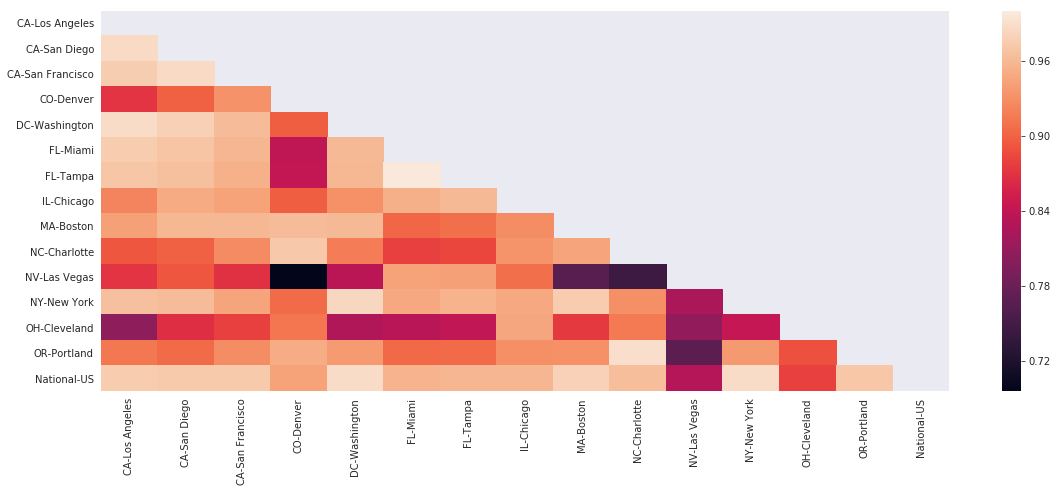

In [20]:
plt.figure(figsize=(19, 7))
CORR_HOUSING = HOUSING.corr()
mask = np.zeros_like(CORR_HOUSING)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(CORR_HOUSING, mask=mask)


# <h3> Correlation Heatmap (Welch's p-value)</h3>

The range of correlations in this map is a lot wider than our first map. This would be a more accurate way of graphing correlation because the variance in the housing price index varies widely between cities. This also leaves room for other local factors to explain the difference in housing price costs between cities.

In [21]:
def ttester(df, col_name):
    welch_t = []
    for col in df.columns.values[1:]:
        welch_t.append(scipy.stats.ttest_ind(df[col_name],
                       df[col], equal_var=False).pvalue)
    return pd.DataFrame(welch_t)


In [22]:
def welch_maker(df, col_names):
    welch_t = pd.DataFrame()
    for col in col_names:
        welch_t = pd.DataFrame(ttester(df, col))
        welch_t.columns = [col]
        welch_t.index = [col]
    plt.figure(figsize=(19, 7))
    mask = np.zeros_like(welch_t)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("dark"):
        ax = sns.heatmap(welch_t, mask=mask)
    return



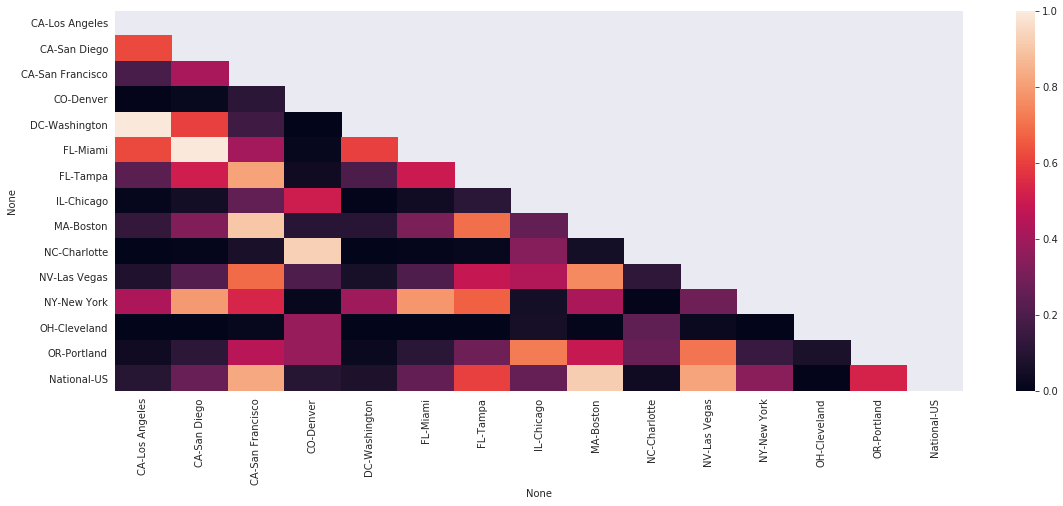

In [23]:
welch_maker(HOUSING_PRICE_INDEX, [HOUSING_PRICE_INDEX.columns.values[1:]])

# How fast are the prices for houses rising?

##### The next table is the cumulative sum of the change in the housing price index

In [26]:
CHANGE_HOUSING = pd.DataFrame()
for (i, x) in enumerate(HOUSING):
    CHANGE_HOUSING[x] = ([(((b - a) / a)) for a, b in
                          zip(HOUSING_PRICE_INDEX[x][:-1],
                              HOUSING_PRICE_INDEX[x][1:-1])])
CHANGE_HOUSING.loc['Total', :] = CHANGE_HOUSING.sum()
CHANGE_HOUSING.loc['Total']

CA-Los Angeles      1.489703
CA-San Diego        1.466305
CA-San Francisco    1.578615
CO-Denver           1.171841
DC-Washington       1.225701
FL-Miami            1.171127
FL-Tampa            0.844030
IL-Chicago          0.874417
MA-Boston           0.940807
NC-Charlotte        0.685039
NV-Las Vegas        0.956466
NY-New York         0.846774
OH-Cleveland        0.675830
OR-Portland         1.492738
National-US         0.969793
Name: Total, dtype: float64

# How much faster has the National cost of housing rose compared to income?

In [29]:
CHANGE_INCOME = pd.DataFrame()
for (i, x) in enumerate(INCOME.columns.values[1:]):
    CHANGE_INCOME[x] = ([(((b - a) / a)) for a, b in
                         zip(INCOME[x][0:-1], INCOME[x][1:-1])])
CHANGE_INCOME.loc['Total', :] = CHANGE_INCOME.sum()

In [30]:
def speedgrow(a, b):
    GROWTH = []
    for col in CHANGE_INCOME.loc['Total']:
        GROWTH.append([a/col])
    x = pd.DataFrame(GROWTH)
    x.index = CHANGE_INCOME.columns
    x.columns = ["National Housing Change / Income Change"]
    return x


In [31]:
speedgrow(CHANGE_HOUSING.loc['Total']['National-US'],
          CHANGE_INCOME.loc['Total'])


,National Housing Change / Income Change
Lowest,-1854.027112
Second,85.665157
Third,14.092633
Fourth,6.248998
Top 5 percent,3.846259


### Based on what I can see here, there is not a level of income that is keeping up with the housing market.

# Bias & Limitations


## Bias

### Given that these sources were curated by government agencies, I am assuming that they would do a good job with eliminating bias from the data

## Limitations

#### Before diving into the variables I would consider to be helpful in future research, I want to point out one obvious limitation and that is the amount of data in years being evaluated. Looking at only 28 years I may miss trends or cycles with each of the datasets I evaluated and datasets on variables I did not include in this notebook. The business insider article that inspired me referenced data pointing back to 1970.

<span style="font-size:16pt">

### There are many other variables that should be considered when talking about "buying power"


##### Some of the variables that should be included and considered in future work are:
1. Inflation
1. US citizen migration
1. Employment Data
    1. Experience
    1. Industry
    1. Role
1. Other types of income and assets
1. Consumer Price Index
1. Rates of homeownership
1. And a lot more
</span>

# END

Thank you for checking out the notebook presentation! 